2 вариант - дополнение к прошлому заданию

Не хватает параметра Biased

источник:https://proglib.io/p/neural-nets-guide


Свойства хорошей ф активации: непрерывная на всей области определения ,монотонно неубывающая функция, нелинейная, низкая вычислительная сложность

для выход слоя: зависит от формата выходных значений 1)прогноз сети - числовые значения (задача регрессии) не использовать фа 2) бинарное значение - сигмоида 3) прогнозирование 1 метки из нескольких (классификация) - softmax (лучше использовать совместно с  фа категориальной кросс-энтропией)




Softmax

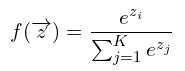

Categorical cross-entropy

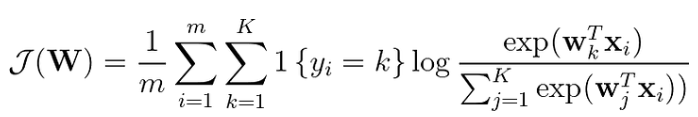

In [ ]:
#from scipy.special import softmax
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())


In [ ]:
def cross_E(y_true, y_pred):    
    #print(y_true, y_pred, y_true * np.log(y_pred + 10**-100))             # CE
    return -np.sum(y_true * np.log(y_pred + 10**-1))


In [ ]:
import sys, numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed(1)
relu = lambda x:(x>=0) * x # returns x if x > 0, return 0 otherwise
relu2deriv = lambda x: x>=0 # returns 1 for input > 0, return 0 otherwise
learning_rate, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 120, 100, 784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

correct_cnt_test=[]
error_test=[]

correct_cnt_=[]
error_=[]

iteration=[]

for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape) #dropout in forward pass
        layer_1 *= dropout_mask * 2 #dropout in forward pass
        layer_2 = np.dot(layer_1,weights_1_2)

        layer_2=softmax(layer_2)
        #error += np.sum((labels[i:i+1] - layer_2) ** 2)
        
        error += cross_E(labels[i:i+1], layer_2)

        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)* relu2deriv(layer_1)

        weight_1_2_corrections = layer_1.T.dot(layer_2_delta)
        weight_0_1_corrections = layer_0.T.dot(layer_1_delta)
        


        weights_1_2 += learning_rate * weight_1_2_corrections
        weights_0_1 += learning_rate * weight_0_1_corrections 
        
    error_.append(error/float(len(test_images)))
    correct_cnt_.append(correct_cnt/float(len(test_images)))
    sys.stdout.write("\r I:"+str(j)+ \
                     " Train-Err:" + str(error/float(len(images)))[0:5] +\
                     " Train-Acc:" + str(correct_cnt/float(len(images))))
    
    
    if(j % 10 == 0 or j == iterations-1):
        iteration.append(j)
        error, correct_cnt = (0.0, 0)

        for i in range(len(test_images)):

            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1,weights_1_2)

            layer_2=softmax(layer_2)

            error+=cross_E(labels[i:i+1], layer_2)
            correct_cnt += int(np.argmax(layer_2) == \
                                            np.argmax(test_labels[i:i+1]))            
        
        sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(correct_cnt/float(len(test_images))))
        error_test.append(error/float(len(test_images)))
        correct_cnt_test.append(correct_cnt/float(len(test_images)))
        print()

 I:0 Train-Err:1.223 Train-Acc:0.516 Test-Err:0.171 Test-Acc:0.696
 I:10 Train-Err:0.223 Train-Acc:0.856 Test-Err:0.196 Test-Acc:0.8622
 I:20 Train-Err:0.157 Train-Acc:0.889 Test-Err:0.199 Test-Acc:0.8673
 I:30 Train-Err:0.119 Train-Acc:0.9 Test-Err:0.200 Test-Acc:0.8669
 I:40 Train-Err:0.137 Train-Acc:0.89 Test-Err:0.201 Test-Acc:0.858
 I:50 Train-Err:0.183 Train-Acc:0.854 Test-Err:0.200 Test-Acc:0.8462
 I:60 Train-Err:0.191 Train-Acc:0.859 Test-Err:0.201 Test-Acc:0.8474
 I:70 Train-Err:0.241 Train-Acc:0.832 Test-Err:0.202 Test-Acc:0.8305
 I:80 Train-Err:0.352 Train-Acc:0.773 Test-Err:0.201 Test-Acc:0.7996
 I:90 Train-Err:0.441 Train-Acc:0.743 Test-Err:0.204 Test-Acc:0.8111
 I:100 Train-Err:0.491 Train-Acc:0.726 Test-Err:0.203 Test-Acc:0.7915
 I:110 Train-Err:0.534 Train-Acc:0.716 Test-Err:0.205 Test-Acc:0.8073
 I:119 Train-Err:0.588 Train-Acc:0.695 Test-Err:0.202 Test-Acc:0.7611


In [ ]:
print(iteration, error_test)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 349] [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


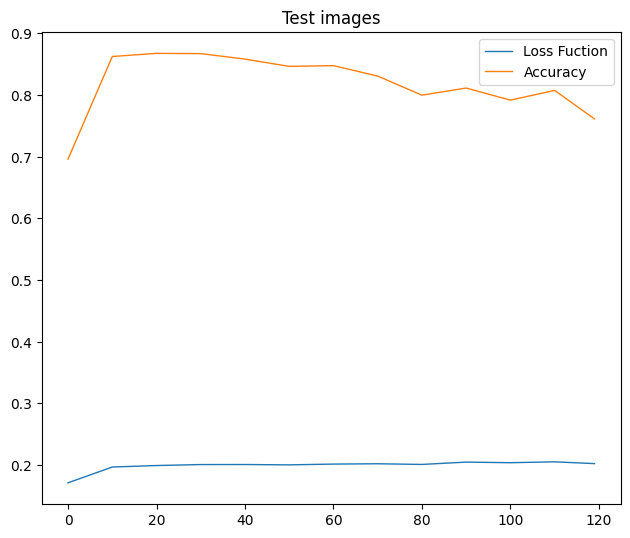

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(iteration, error_test, linewidth = 1, label="Loss Fuction")

ax1.plot(iteration, correct_cnt_test, linewidth = 1, label="Accuracy")
ax1.set_title("Test images")
ax1.legend()

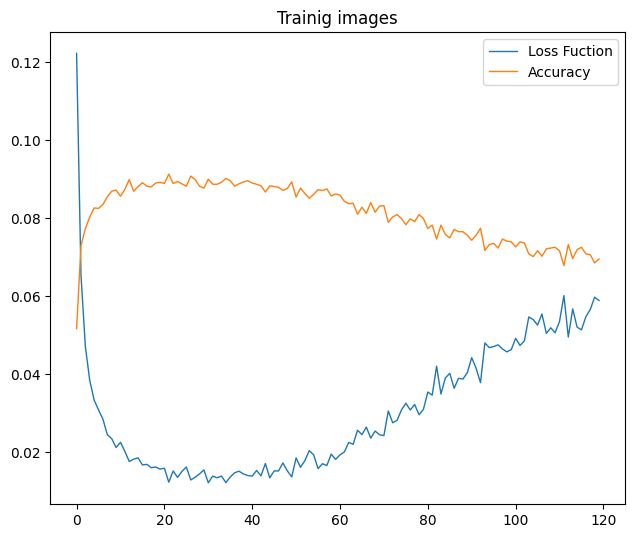

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 10), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(range(120), error_, linewidth = 1, label="Loss Fuction")

ax1.plot(range(120), correct_cnt_, linewidth = 1, label="Accuracy")
ax1.set_title("Trainig images")
ax1.legend()

пакетный градиентный спуск

In [ ]:
import numpy as np
np.random.seed(1)

def relu(x):
    return (x >= 0) * x # returns x if x > 0

def relu2deriv(output):
    return output >= 0 # returns 1 for input > 0

batch_size = 100
learning_rate, iterations = (0.001, 300)
pixels_per_image, num_labels, hidden_size = (784, 10, 100)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

        layer_0 = images[batch_start:batch_end]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[batch_start:batch_end] - layer_2) ** 2)
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

            layer_2_delta = (labels[batch_start:batch_end]-layer_2)/batch_size
            layer_1_delta = layer_2_delta.dot(weights_1_2.T)* relu2deriv(layer_1)
            layer_1_delta *= dropout_mask

            weights_1_2 += learning_rate * layer_1.T.dot(layer_2_delta)
            weights_0_1 += learning_rate * layer_0.T.dot(layer_1_delta)
            
    if(j%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

        sys.stdout.write("\n" + \
                         "I:" + str(j) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                         " Train-Acc:" + str(correct_cnt/ float(len(images))))